### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pycaret.utils import version
version()

'2.3.8'

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *

 ### 2 Reading Data

In [2]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('Data/cleaned_data.csv')

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 21.5 µs


In [6]:
dataset.head()

,created_date,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,2021-07-01 00:08:15,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2021-07-01 00:16:43,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2021-07-01 00:22:20,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2021-07-01 00:23:13,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2021-07-01 00:28:38,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [3]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

In [12]:
dataset.head()

,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


### 3 Setting up Environment: 

In [4]:
%cd /home/Assignment/
!pwd

/home/Assignment
/home/Assignment


In [5]:
# Setting up all directory
root_folder = "/home/Assignment/"
#data_directory = root_folder+"data/raw/"
#data_profile_path = root_folder+"/data/profile_report/"
#intermediate_data_path = root_folder+"data/interim/"
db_path = root_folder+"/02_training_pipeline/notebooks/"
#print("directory loaded")
db_file = "lead_scoring_model_experimentation.db"

In [6]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location
import sqlite3
from sqlite3 import Error

def create_sqlit_connection(db_path,db_file):
    """ create a database connection to a SQLite database """
    conn = None
# opening the conncetion for creating the sqlite db
    try:
        conn = sqlite3.connect(db_path+db_file)
        print(sqlite3.version)
# return an error if connection not established
    except Error as e:
        print(e)
# closing the connection once the database is created
    finally:
        if conn:
            conn.close()

In [ ]:
'''
Now you need to start the MLflow server in a new terminal. 
Note: Before you start the MLflow server, create a folder named mlruns in the assignment directory.
Now you need to run the command to start MLflow server such that:
1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.
2. mlruns folder is used as an artifact directory. 
3. The server runs on the port 6006.

The steps to do so are as follows:
Open a new terminal.
Then go to the Assignment directory using the cd command. Type the command: cd Assignment/
Create a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns
Then, type the following command to start the MLflow server: 
mlflow server --backend-store-uri='sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0
'''

In [7]:
# Once, your server is successfully running, create a mlflow tracking uri at "http://0.0.0.0:6006"
mlflow.set_tracking_uri("http://0.0.0.0:6006")

In [11]:
# setup pycaret 
Baseline_model_exp01 = setup(data = dataset, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,
                   n_jobs=-1,use_gpu=False,
                   log_experiment=True,experiment_name='Baseline_model_exp01',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True,
                   log_profile=False)


,Description,Value
0,session_id,42
1,Target,app_complete_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(238964, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2023/08/16 04:20:52 INFO mlflow.tracking.fluent: Experiment with name 'Baseline_model_exp01' does not exist. Creating a new experiment.


### 4 : Model Experimentation with pycaret

In [12]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']
best_model = compare_models(fold = 5, exclude=['gbc','knn','qda', 'dummy', 'svm', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7386,0.8211,0.8343,0.7020,0.7624,0.4765,0.4854,1.0700
xgboost,Extreme Gradient Boosting,0.7384,0.8211,0.8321,0.7025,0.7618,0.4762,0.4847,9.6500
rf,Random Forest Classifier,0.7373,0.8185,0.8228,0.7044,0.7590,0.4741,0.4811,2.8500
et,Extra Trees Classifier,0.7367,0.8176,0.8210,0.7044,0.7582,0.4729,0.4797,3.6020
dt,Decision Tree Classifier,0.7364,0.8166,0.8205,0.7041,0.7579,0.4723,0.4789,0.2260
lr,Logistic Regression,0.7098,0.7836,0.8222,0.6731,0.7402,0.4189,0.4297,2.2120
ridge,Ridge Classifier,0.7005,0.0000,0.7962,0.6702,0.7278,0.4003,0.4077,0.1080
lda,Linear Discriminant Analysis,0.7005,0.7733,0.7961,0.6702,0.7277,0.4003,0.4077,0.4760
nb,Naive Bayes,0.6629,0.7335,0.8924,0.6134,0.7269,0.3241,0.3653,0.4760


In [13]:
# create a model which gives the highest accuracy
lgbm  = create_model('lightgbm', fold = 5)

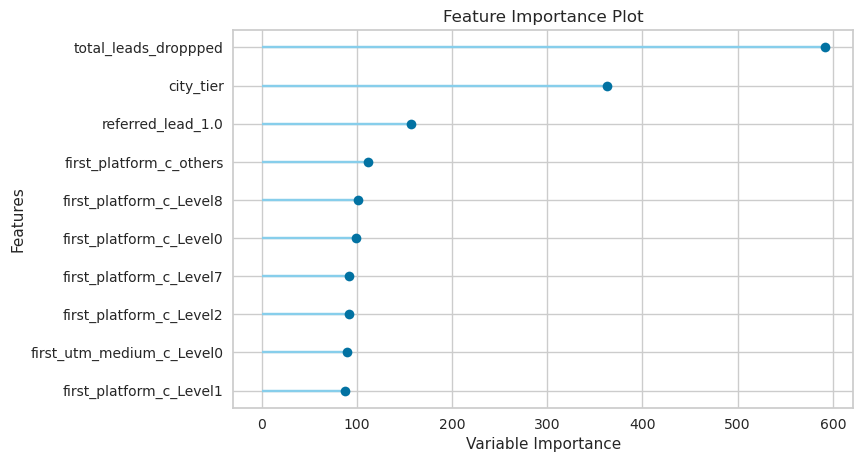

In [14]:
# create feature importance plot
plot_model(lgbm, plot='feature')

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [ ]:
# 
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
#
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.

In [8]:
dataset = dataset[['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']]
dataset.head()

,total_leads_droppped,city_tier,referred_lead,app_complete_flag,first_platform_c,first_utm_medium_c,first_utm_source_c
0,1.0,1.0,0.0,1,Level0,Level11,Level2
1,1.0,2.0,0.0,1,Level3,Level0,others
2,1.0,1.0,0.0,1,Level3,Level0,Level0
3,2.0,1.0,0.0,0,Level1,Level3,others
4,1.0,1.0,0.0,0,Level3,Level0,Level0


In [9]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 
Baseline_model_exp02 = setup(data = dataset, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,
                   normalize = False,
                   transformation = False,          
                   n_jobs=-1,use_gpu=False,
                   log_experiment=True,experiment_name='Baseline_model_exp02',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True,
                   log_profile=False)

,Description,Value
0,session_id,42
1,Target,app_complete_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(238964, 7)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


2023/08/25 06:14:11 INFO mlflow.tracking.fluent: Experiment with name 'Baseline_model_exp02' does not exist. Creating a new experiment.


In [17]:
best_model = compare_models(fold = 5, exclude=['gbc','knn','qda', 'dummy', 'svm', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7385,0.8210,0.8342,0.7020,0.7624,0.4765,0.4853,1.4180
xgboost,Extreme Gradient Boosting,0.7384,0.8210,0.8320,0.7026,0.7618,0.4763,0.4847,11.2940
rf,Random Forest Classifier,0.7373,0.8184,0.8231,0.7043,0.7591,0.4741,0.4811,2.6620
et,Extra Trees Classifier,0.7366,0.8174,0.8211,0.7042,0.7582,0.4727,0.4795,3.3220
dt,Decision Tree Classifier,0.7363,0.8166,0.8205,0.7041,0.7578,0.4722,0.4788,0.1640
lr,Logistic Regression,0.7098,0.7835,0.8220,0.6731,0.7401,0.4188,0.4296,0.5180
ridge,Ridge Classifier,0.7002,0.0000,0.7959,0.6700,0.7275,0.3998,0.4072,0.0780
lda,Linear Discriminant Analysis,0.7002,0.7726,0.7959,0.6700,0.7275,0.3998,0.4072,0.2800
nb,Naive Bayes,0.6701,0.7337,0.8568,0.6255,0.7231,0.3387,0.3650,0.0840


In [10]:
# You should get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret
lgbm  = create_model('lightgbm', fold = 5)

In [12]:
pip install -v "optuna==2.6.0"

Using pip 21.2.4 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)
  Using cached optuna-2.6.0-py3-none-any.whl (293 kB)
  Link requires a different Python (3.8.12 not in: '>=3.9'): https://files.pythonhosted.org/packages/26/de/437a60a69f7fd0c79264530a97787b2ac7394616e3661236201518f8a47d/numpy-1.25.0rc1.tar.gz#sha256=224e8862a1cd357eede831b270b9e6c51d2cbc2bb5cc2e2b8d0c76d52cbd1edc (from https://pypi.org/simple/numpy/) (requires-python:>=3.9)
  Link requires a different Python (3.8.12 not in: '>=3.9'): https://files.pythonhosted.org/packages/d0/b2/fe774844d1857804cc884bba67bec38f649c99d0dc1ee7cbbf1da601357c/numpy-1.25.0.tar.gz#sha256=f1accae9a28dc3cda46a91de86acf69de0d1b5f4edd44a9b0c3ceb8036dfff19 (from https://pypi.org/simple/numpy/) (requires-python:>=3.9)
  Link requires a different Python (3.8.12 not in: '>=3.9'): https://files.pythonhosted.org/packages/cf/7a/f68d1d658a0e68084097beb212fa9356fee7eabff8b57231cc4acb555b12/numpy-1.25.1.tar.gz#sha256=9a3a9f3a61480cc086117b426a

In [13]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC
tuned_lgbm_optuna,tuner_0 = tune_model(lgbm, 
                                    search_library='optuna',
                                    fold = 10,
                                    optimize = 'AUC',
                                    choose_better=True,
                                    return_tuner=True)

In [14]:
# Print the final models configuration so that we can use it in the model retraining pipeline 
print(tuned_lgbm_optuna)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[LightGBM] [Warning] bagging_fraction is set=0.7786768141629511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7786768141629511
[LightGBM] [Warning] feature_fraction is set=0.9694119957719998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9694119957719998
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7786768141629511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77